# An introduction to `relatio` 
**Runtime $\sim$ 20min**

Original paper: ["Text Semantics Capture Political and Economic Narratives"](https://arxiv.org/abs/2108.01720)

----------------------------

This is a short demo of the package `relatio`.  It takes as input a text corpus and outputs a list of narrative statements. The pipeline is unsupervised: the user does not need to specify narratives beforehand. Narrative statements are defined as tuples of semantic roles with a (agent, verb, patient) structure. 

Here, we present the main functions to quickly obtain narrative statements from a corpus.

----------------------------

In this tutorial, we work with the Trump Tweet Archive corpus.

----------------------------

In [ ]:
from pathlib import Path
out_dir = Path("output")
out_dir.mkdir(parents=True, exist_ok=True)  # creates the folder if missing

In [1]:
# Catch warnings for an easy ride
from relatio import FileLogger
logger = FileLogger(level = 'WARNING')

/home/gauthier/miniconda3/envs/relatio_test/lib/python3.10/site-packages/google/api_core/_python_version_support.py:275: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
/home/gauthier/miniconda3/envs/relatio_test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from relatio import load_data
df = load_data(dataset = "trump_tweet_archive", content = "raw")

In [3]:
from relatio import Preprocessor

p = Preprocessor(
    spacy_model = "en_core_web_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.4 MB/s  0:00:00m0:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

Splitting into sentences...


100%|████████████████████████████████████████████████████████| 32323/32323 [00:18<00:00, 1776.01it/s]


In [5]:
from relatio import SRL

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device = -1
)

srl_res = SRL(df['sentence'][0:100], progress_bar=True)

from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res, 
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)

Running SRL...


100%|██████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.90it/s]


Extracting semantic roles...


100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 26148.05it/s]

{'ARG0': 'Republicans and Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'thousands of hardworking American Patriots who', 'B-V': 'love', 'ARG1': 'our Country'}
{'ARG0': 'thousands of hardworking American Patriots who', 'B-V': 'cherish', 'ARG1': 'our values'}
{'ARG0': 'who', 'B-V': 'put', 'ARG1': 'AMERICA FIRST'}
{'ARG0': 'the Democrats', 'B-V': 'know', 'ARG1': 'it'}
{'ARG0': 'Almost all recent elections', 'B-V': 'using', 'ARG1': 'this system'}
{'ARG0': 'I', 'B-V': 'm', 'ARG1': 'running as a proud Democrat , for the Senate'}
{'ARG0': 'I', 'B-V': 'running', 'ARG1': 'for the Senate'}
{'ARG0': 'our County - China', 'B-V': 'own', 'B-ARGM-MOD': 'will', 'ARG1': 'us'}
{'ARG0': 'Sudan', 'B-V': 'agreed', 'ARG1': 'to a peace and normalization agreement with Israel'}
{'ARG0': 'that', 'B-V': 's', 'ARG1': 'to have done so in only a matter of weeks', 'ARG2': 'THREE Arabcountries'}
{'ARG0': 'Arabcountries', 'B-V': 'done', 'ARG1': 'so'}
{'ARG0': 'AdamLaxalt', 'B-V': 'finding',

In [6]:
sentence_index, roles = p.extract_svos(df['sentence'], expand_nouns = True, only_triplets = False, progress_bar = True) 
for svo in roles[0:20]: print(svo)

Extracting SVOs...


100%|████████████████████████████████████████████████████████| 63723/63723 [00:21<00:00, 2941.05it/s]


{'ARG0': 'Republicans', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'B-V': 'hardworking', 'ARG1': 'American Patriots'}
{'ARG0': 'American Patriots', 'B-V': 'love', 'ARG1': 'our Country'}
{'B-V': 'cherish', 'ARG1': 'our values'}
{'B-V': 'respect', 'ARG1': 'our laws'}
{'B-V': 'put', 'ARG1': 'AMERICA'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'ARG0': 'the Democrats', 'B-V': 'know', 'ARG1': 'it'}
{'B-V': 'using', 'ARG1': 'this system'}
{'ARG0': 'far fewer Ballots', 'B-V': 'count'}
{'ARG0': 'Almost all recent elections', 'B-V': 'ended'}
{'B-V': 'missing', 'ARG1': 'Ballots'}
{'B-V': 'missing', 'ARG1': 'amp'}
{'B-V': 'Getting', 'ARG1': 'a little exercise'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'Elise'}
{'ARG0': 'The threshold identification', 'B-V': 'turning'}
{'B-V': 'anticipated'}
{'B-V': 'impacted', 'ARG1': 'A very large number'}


In [7]:
postproc_roles = p.process_roles(roles, 
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = './output/postproc_roles.json')

Cleaning phrases for role ARG0...


100%|████████████████████████████████████████████████████████| 50225/50225 [00:14<00:00, 3481.06it/s]


Cleaning phrases for role B-V...


100%|████████████████████████████████████████████████████████| 93083/93083 [00:23<00:00, 3943.89it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:00, ?it/s]


Cleaning phrases for role ARG1...


100%|████████████████████████████████████████████████████████| 49435/49435 [00:12<00:00, 3933.18it/s]


Cleaning phrases for role ARG2...


0it [00:00, ?it/s]


In [8]:
for d in postproc_roles[0:20]: print(d)

{'ARG0': 'republican', 'B-V': 'create', 'ARG1': 'our economic problem'}
{'ARG0': 'democrat', 'B-V': 'create', 'ARG1': 'our economic problem'}
{'B-V': 'hardworke', 'ARG1': 'american patriot'}
{'ARG0': 'american patriot', 'B-V': 'love', 'ARG1': 'our country'}
{'B-V': 'cherish', 'ARG1': 'our value'}
{'B-V': 'respect', 'ARG1': 'our law'}
{'B-V': 'put', 'ARG1': 'america'}
{'B-V': 'thank', 'ARG1': 'you'}
{'ARG0': 'the democrats', 'B-V': 'know', 'ARG1': 'it'}
{'B-V': 'use', 'ARG1': 'this system'}
{'ARG0': 'far few ballot', 'B-V': 'count'}
{'ARG0': 'almost all recent election', 'B-V': 'end'}
{'B-V': 'miss', 'ARG1': 'ballot'}
{'B-V': 'miss', 'ARG1': 'amp'}
{'B-V': 'get', 'ARG1': 'a little exercise'}
{'B-V': 'thank', 'ARG1': 'you'}
{'B-V': 'elise'}
{'ARG0': 'the threshold identification', 'B-V': 'turn'}
{'B-V': 'anticipate'}
{'B-V': 'impact', 'ARG1': 'a very large number'}


In [9]:
from relatio.utils import load_roles
postproc_roles = load_roles('./output/postproc_roles.json')

In [10]:
known_entities = p.mine_entities(
    df['sentence'], 
    clean_entities = True, 
    progress_bar = True,
    output_path = './output/entities.pkl'
)

for n in known_entities.most_common(10): print(n)

Mining named entities...


100%|████████████████████████████████████████████████████████| 63723/63723 [00:25<00:00, 2514.89it/s]

('democrats', 1151)
('china', 902)
('u s', 841)
('american', 577)
('america', 573)
('trump', 516)
('barackobama', 497)
('republicans', 437)
('the united states', 421)
('republican', 415)


In [11]:
from relatio.utils import load_entities
known_entities = load_entities('./output/entities.pkl')

top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

In [12]:
from relatio.narrative_models import NarrativeModel

m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)    
             
m.fit(postproc_roles, progress_bar = True) 

Downloading: 1.23kB [00:00, 2.46MB/s]
Downloading: 100%|██████████████████████████████████████████████████| 190/190 [00:00<00:00, 1.35MB/s]
Downloading: 10.5kB [00:00, 12.0MB/s]
Downloading: 100%|███████████████████████████████████████████████████| 116/116 [00:00<00:00, 601kB/s]
Downloading: 39.3kB [00:00, 32.8MB/s]
Downloading: 100%|██████████████████████████████████████████████| 90.9M/90.9M [00:05<00:00, 15.8MB/s]
Downloading: 100%|██████████████████████████████████████████████| 90.4M/90.4M [00:07<00:00, 12.9MB/s]
Downloading: 100%|██████████████████████████████████████████████| 90.4M/90.4M [00:06<00:00, 14.9MB/s]
Downloading: 100%|██████████████████████████████████████████████| 90.3M/90.3M [00:04<00:00, 19.6MB/s]
Downloading: 100%|██████████████████████████████████████████████| 90.3M/90.3M [00:05<00:00, 16.5MB/s]
Downloading: 100%|██████████████████████████████████████████████| 45.2M/45.2M [00:02<00:00, 16.7MB/s]
Downloading: 100%|██████████████████████████████████████████████| 23.0

Computing phrase embeddings...


100%|█████████████████████████████████████████████████████████| 10505/10505 [00:56<00:00, 186.76it/s]


Computing phrase embeddings...


100%|█████████████████████████████████████████████████████████| 16921/16921 [01:39<00:00, 169.81it/s]


Computing phrase embeddings...


100%|█████████████████████████████████████████████████████████| 24526/24526 [02:43<00:00, 150.36it/s]


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}
Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}
Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [24, 61, 122, 183, 245], 'random_state': 0}
The silhouette score suggests the optimal number of clusters is 245. This corresponds to index 4.
The elbow method (inertia score) suggests the optimal number of clusters is 61. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


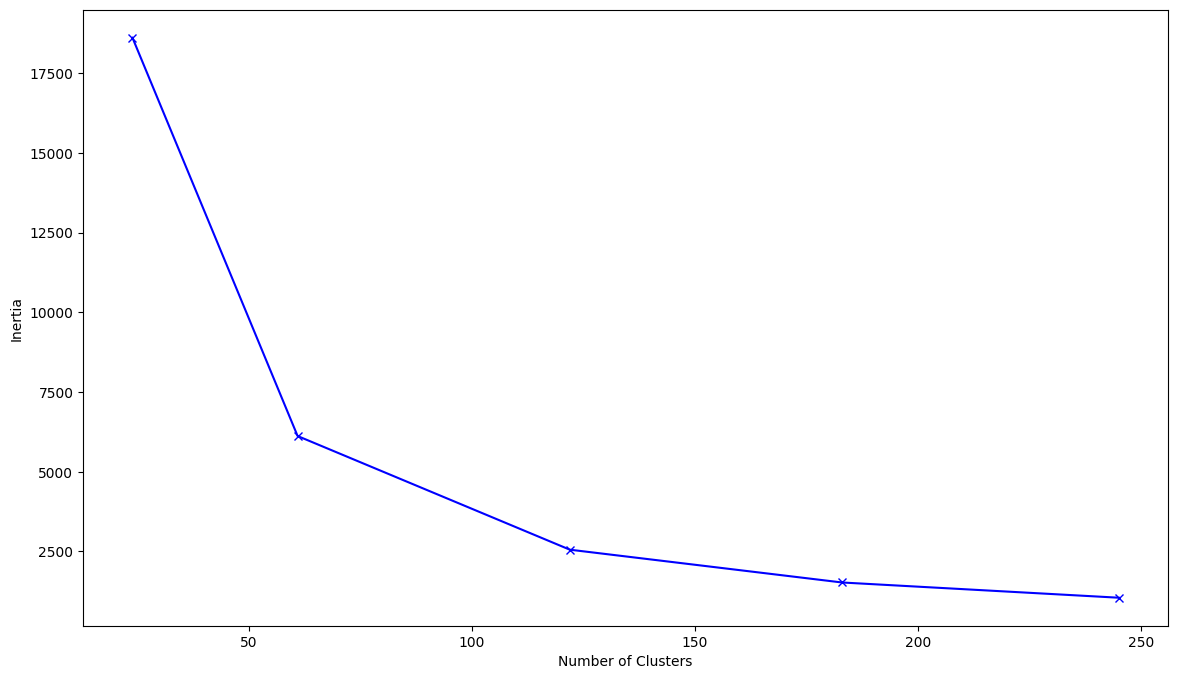

In [13]:
m.plot_selection_metric(metric = 'inertia') 

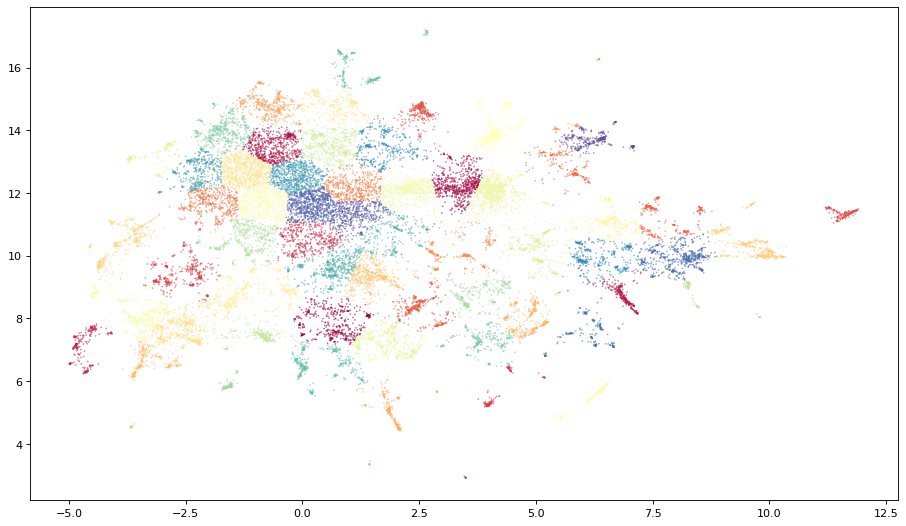

In [14]:
m.plot_clusters(path = './output/clusters.pdf') 

In [15]:
m.clusters_to_txt(path = './output/clusters.txt')

In [16]:
narratives = m.predict(postproc_roles, progress_bar = True)


Predicting entities for role: ARG0...
Computing phrase embeddings...


100%|█████████████████████████████████████████████████████████| 50128/50128 [05:12<00:00, 160.24it/s]


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...

Predicting entities for role: ARG1...
Computing phrase embeddings...


100%|█████████████████████████████████████████████████████████| 49149/49149 [05:14<00:00, 156.37it/s]


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...


In [17]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives: 
    pretty_narratives.append(prettify(n))

for i in range(10):           
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

{'ARG0': 'Republicans', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'republican', 'B-V': 'create', 'ARG1': 'our economic problem'}
the democrats create the economy
{'ARG0': 'Democrats', 'B-V': 'created', 'ARG1': 'our economic problems'}
{'ARG0': 'democrat', 'B-V': 'create', 'ARG1': 'our economic problem'}
the democrats create the economy
{'B-V': 'hardworking', 'ARG1': 'American Patriots'}
{'B-V': 'hardworke', 'ARG1': 'american patriot'}
hardworke people
{'ARG0': 'American Patriots', 'B-V': 'love', 'ARG1': 'our Country'}
{'ARG0': 'american patriot', 'B-V': 'love', 'ARG1': 'our country'}
people love our country
{'B-V': 'cherish', 'ARG1': 'our values'}
{'B-V': 'cherish', 'ARG1': 'our value'}
cherish the economy
{'B-V': 'respect', 'ARG1': 'our laws'}
{'B-V': 'respect', 'ARG1': 'our law'}
respect crime
{'B-V': 'put', 'ARG1': 'AMERICA'}
{'B-V': 'put', 'ARG1': 'america'}
put our country
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'thank', 'ARG1': 'you'}
thank you
{'ARG0': 'the Dem

In [18]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives, 
    top_n = 100, 
    prune_network = True
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = './output/trump_network_of_narratives.html'
    )

./output/network_of_narratives.html


In [19]:
import pickle as pk 

with open('./output/narrative_model.pkl','wb') as f:
    pk.dump(m,f)

In [20]:
with open('./output/narrative_model.pkl','rb') as f:
    m = pk.load(f)